<a href="https://colab.research.google.com/github/Farheen96/Farheen96/blob/main/Insights_on_Oil_Consumption_prices_worldwide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For Numeric Computation
import numpy as np

# For Data Analysis
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Interactive Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots





In [30]:
!pip install pycountry_convert


!pip install geocoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 70.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.0/229.0 kB 24.7 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=a0fbfe8b7d587c74bdd1b26fd52afd7a073aa33dd6c76c7b29f1333a84228116
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 1.9 MB/s eta 0:00:00


In [2]:
# Dataset through Pandas
# Reason for using ISO-8859-1:
#   The dataset exceeds utf-8 (0-127) encoding. It requires a larger-width encodig such as latin-1 or ISO-8859-1 (0-255)
data = pd.read_csv('Petrol Dataset.csv' ,encoding='ISO-8859-1')

data.head(10)

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8
5,6,Saudi Arabia,"3,302,000",3%,1560.2,2.35,0.62,131.34,"20,110","8,557",5
6,7,Brazil,"2,984,000",3%,221.9,5.36,1.42,299.27,"6,797","1,268",6
7,8,South Korea,"2,605,440",3%,783.4,6.09,1.61,340.52,"31,632","5,194",7
8,9,Canada,"2,486,301",3%,1047.6,6.76,1.79,377.74,"43,258","6,399",6
9,10,Germany,"2,383,393",3%,444.5,7.65,2.02,427.44,"46,208","6,040",14


In [3]:
data.shape

(181, 11)

In [4]:
data.isnull().sum()

S#                                      0
Country                                 0
Daily Oil Consumption (Barrels)         0
World Share                             0
Yearly Gallons Per Capita               0
Price Per Gallon (USD)                  0
Price Per Liter (USD)                   0
Price Per Liter (PKR)                   0
GDP Per Capita ( USD )                  0
Gallons GDP Per Capita Can Buy          0
xTimes Yearly Gallons Per Capita Buy    0
dtype: int64

In [5]:
data.nunique()

S#                                      181
Country                                 181
Daily Oil Consumption (Barrels)         156
World Share                               8
Yearly Gallons Per Capita               180
Price Per Gallon (USD)                  156
Price Per Liter (USD)                   118
Price Per Liter (PKR)                   165
GDP Per Capita ( USD )                  178
Gallons GDP Per Capita Can Buy          178
xTimes Yearly Gallons Per Capita Buy     34
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S#                                    181 non-null    int64  
 1   Country                               181 non-null    object 
 2   Daily Oil Consumption (Barrels)       181 non-null    object 
 3   World Share                           181 non-null    object 
 4   Yearly Gallons Per Capita             181 non-null    float64
 5   Price Per Gallon (USD)                181 non-null    float64
 6   Price Per Liter (USD)                 181 non-null    float64
 7   Price Per Liter (PKR)                 181 non-null    float64
 8   GDP Per Capita ( USD )                181 non-null    object 
 9   Gallons GDP Per Capita Can Buy        181 non-null    object 
 10  xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(4), int6

##To allow more efficiency in performing mathematical calculations because it uses less memory and allows for faster comptations. let's **convert** the **"object"** datatypes to **"float"**

In [8]:
# Creating a dictionary of all special characters in our dataset
char = {'%': '',
        ',': '',}

# Looping through all the features one by one
for feature in data.columns:
# Creating a condition to only target "Object" datatype and ignore the rest including the "Country" column
    if data[feature].dtype == "object" and feature != "Country":
# Creating a loop for the dictionary
        for key, value in char.items():
# If the special characters are in the columns then they'd get replaced by '' empty space
            data[feature] = data[feature].str.replace(key, value)
# After removing special character we're converting the features from "Object" to "Float" datatype
        data[feature] = data[feature].astype("float64")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S#                                    181 non-null    int64  
 1   Country                               181 non-null    object 
 2   Daily Oil Consumption (Barrels)       181 non-null    float64
 3   World Share                           181 non-null    float64
 4   Yearly Gallons Per Capita             181 non-null    float64
 5   Price Per Gallon (USD)                181 non-null    float64
 6   Price Per Liter (USD)                 181 non-null    float64
 7   Price Per Liter (PKR)                 181 non-null    float64
 8   GDP Per Capita ( USD )                181 non-null    float64
 9   Gallons GDP Per Capita Can Buy        181 non-null    float64
 10  xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(8), int6

In [10]:
round(data.describe(),1)

,S#,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
count,181.0,181.0,181.0,181.0,181.0,181.0,181.0,181.0,181.0,181.0
mean,91.0,533573.0,0.5,332.0,5.7,1.5,318.2,15259.8,4179.3,14.2
std,52.4,1858067.1,1.9,436.6,4.4,1.2,244.2,20542.2,15436.4,48.6
min,1.0,51.0,0.0,2.2,0.1,0.0,4.6,274.0,24.0,1.0
25%,46.0,20036.0,0.0,53.9,4.2,1.1,232.0,2033.0,473.0,6.0
50%,91.0,61612.0,0.0,180.2,5.3,1.4,295.0,6127.0,1410.0,9.0
75%,136.0,262352.0,0.0,424.6,6.8,1.8,377.7,20234.0,4103.0,12.0
max,181.0,19687287.0,20.0,3679.5,54.9,14.5,3066.8,115874.0,200700.0,654.0


**Min Oil Consumed (Barrels) per day: 51 Barrels**

**Max Oil Consumed (Barrels) per day: 19.6 Million Barrels**

**Average Oil Consumed (Barrels) per day: 0.5 Million Barrels**

**Min Oil Price (PKR) per liter: 4.6 PKR**

**Max Oil Price (PKR) per liter: 3066.8 PKR**

**Average Oil Price (PKR) per liter: 318.2 PKR**


##Top 5 countries with highest Daily Oil Consumption

In [11]:
fig=px.pie(data.head(5),values='Daily Oil Consumption (Barrels)',names='Country',hole=0.5)
fig.update_layout(title='Daily Oil Consumption (Barrels) - Top 5 Countries',font_size=15,title_x=0.45,annotations=[dict(text='Countries',font_size=18, showarrow=False)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

##Top 5 countries with highest "Share of Oil"

In [12]:
top_share = data.nlargest(5, 'World Share')

# Create a stacked bar with more customization
fig = px.bar(top_share, x='Country', y='World Share', color='Country', title='Top 5 countries with highest "Share of Oil "',

      labels={'World Share': 'World Shares (%) ', 'Country': 'Country '})
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)

##Top 5 countries with highest "GDP Per Capita (USD)

In [13]:
top_share = data.nlargest(5, 'GDP Per Capita ( USD )')

# fig = px.violin(top_share, x="Country", y="GDP Per Capita ( USD )",  color="Country", box=False, points='all')
# fig.show()

fig = px.scatter(top_share, x="Country", y="GDP Per Capita ( USD )", size="GDP Per Capita ( USD )", color="Country", title='Top 5 countries with highest "GDP Per Capita"',
                 hover_name="Country", log_x=False, size_max=600)
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)
fig.show()

##10 countries that consumes highest Oil per person

In [16]:
data["Oil usage per person"] = data["Daily Oil Consumption (Barrels)"]/data["GDP Per Capita ( USD )"]

oil_share = data.nlargest(10, "Oil usage per person")
fig = px.bar(oil_share, x='Country', y='Oil usage per person',
             hover_data=['Country', 'GDP Per Capita ( USD )'], color='Country', title='Top 10 countries that consume highest Oil per Person')
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)
fig.show()

##10 countries can "Buy the Oil" the most?

In [17]:
buy_share = data.nlargest(10, "Gallons GDP Per Capita Can Buy")

fig = px.bar(oil_share, x='Gallons GDP Per Capita Can Buy', y='Country',
             hover_data=['Country', 'Gallons GDP Per Capita Can Buy'], color='Country', title='Top 10 countries that can Buy the most Oil')
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)
fig.show()

##Relation between Price Per Liter (USD) and GDP Per Capita (USD)?

In [18]:
fig = px.scatter(data, x="Price Per Liter (USD)", y="GDP Per Capita ( USD )", size = "GDP Per Capita ( USD )",
color = 'Country', title = 'Relation between Price Per Liter (USD) and GDP Per Capita (USD)', range_x=[0,6], log_y=False)
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)
fig.show()

In [42]:
top_expensive = data.nlargest(5, 'Price Per Liter (USD)')

# fig = px.violin(top_share, x="Country", y="GDP Per Capita ( USD )",  color="Country", box=False, points='all')
# fig.show()

fig = px.bar(top_expensive, x="Country", y="Price Per Liter (USD)", color="Country", title='Top 5 countries with highest "GDP Per Capita"',
                 hover_name="Country", log_x=False)
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)
fig.show()

##**North Korea has most expensive price for oil**

<ipython-input-27-a177acfe8781>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

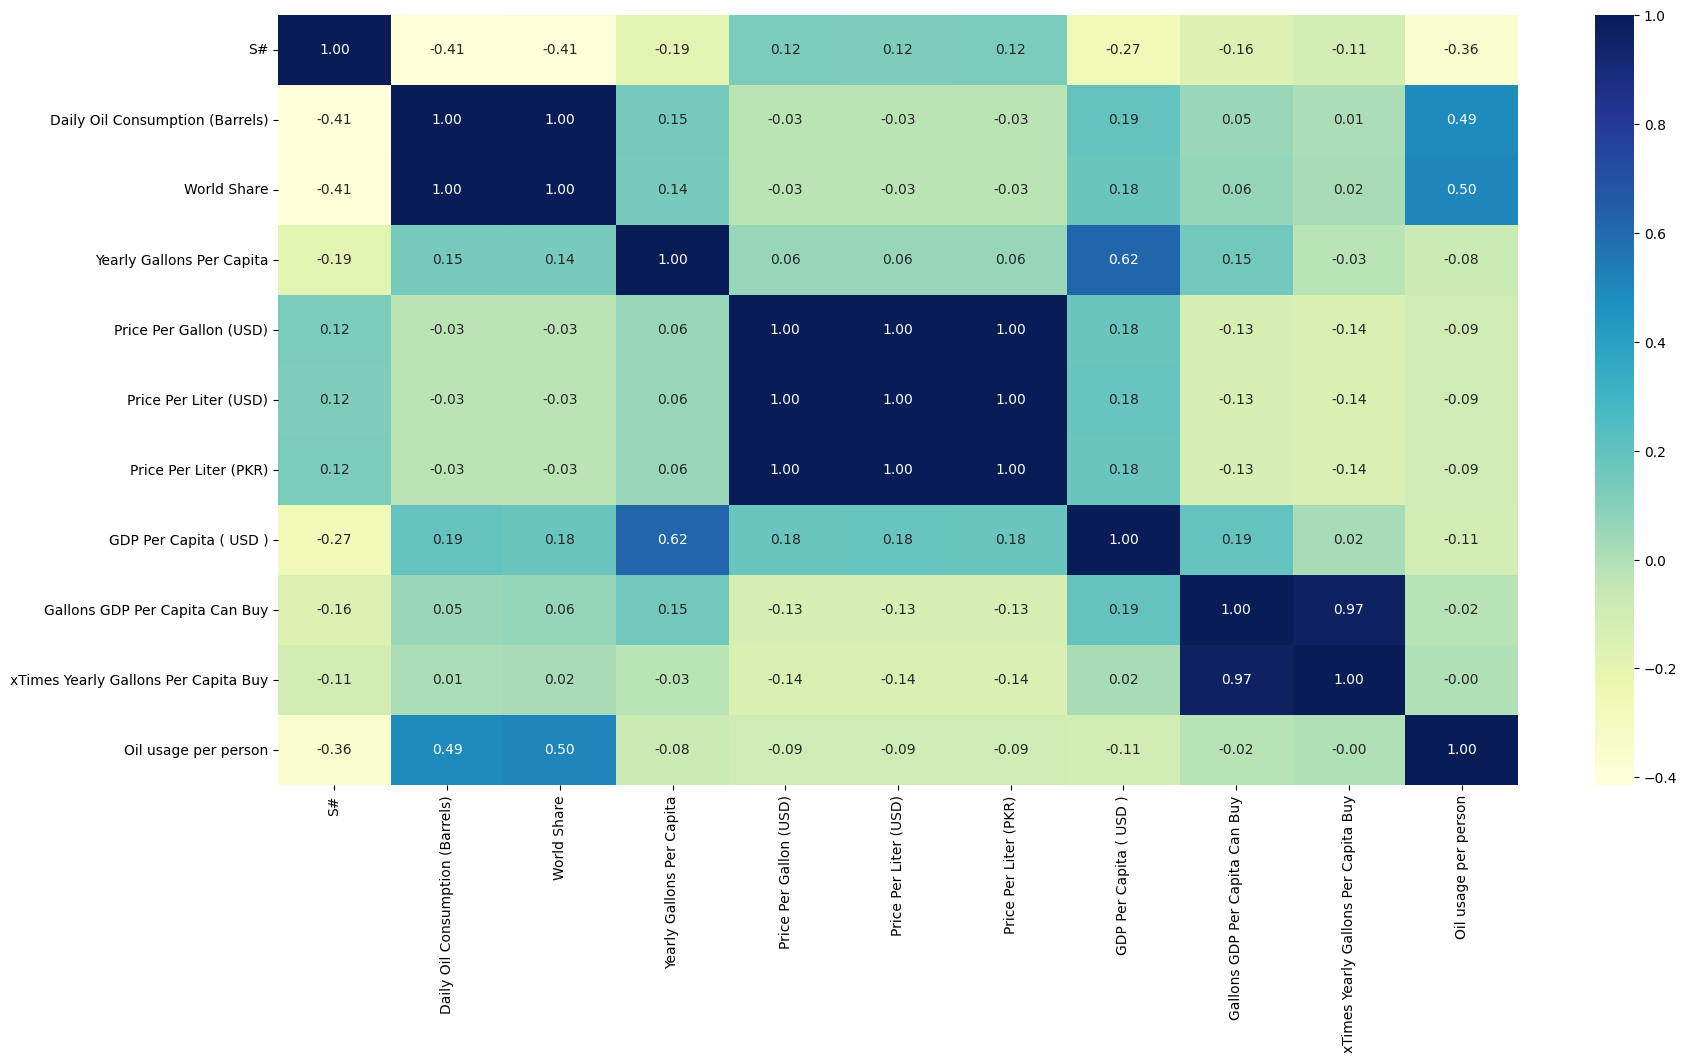

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="YlGnBu")

##Results:
Since the data has no prior history that's why we can't consider 1.0 as an accurate positive correlation. It's flawed.

Correlations such as "0.97" are also suspicious but they might be usefeul if further data is collected.

Correlations "0.49, 0.50, 0.62" are interesting and should be kept a close on to.

In [35]:
countries = {}
import pycountry
for country in pycountry.countries:
    countries[country.name] = country.alpha_3


# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

data["Code"] = [countries.get(x, 'Unknown code') for x in data["Country"]]

fig = px.choropleth(data, locations="Code",
                    hover_name="Country",
                    hover_data=data.columns,
                    color="Daily Oil Consumption (Barrels)",
                    color_continuous_scale="Viridis",
                    range_color=(Average(data["Daily Oil Consumption (Barrels)"]), max(data["Daily Oil Consumption (Barrels)"])),
                    projection="natural earth"

                   )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Note: Some of country name did not change as CODE cause of that first definition of the country. Therefore, we can just see the countries that have country code on the map.